# Gym Goer data set by Valakhorasani. 
# Analysis Performed by Troy Loeffler

In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [120]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/troy/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


In [121]:
#Load the dataset
gym_df = pd.read_csv(path+"/gym_members_exercise_tracking.csv")

In [122]:
gym_df.dropna(inplace=True)
gym_df.head()   

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [123]:
print("Unique Workouts: ", gym_df['Workout_Type'].unique())

Unique Workouts:  ['Yoga' 'HIIT' 'Cardio' 'Strength']


In [124]:
gym_df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


Before we get started let's see what the data looks like before any maniputations

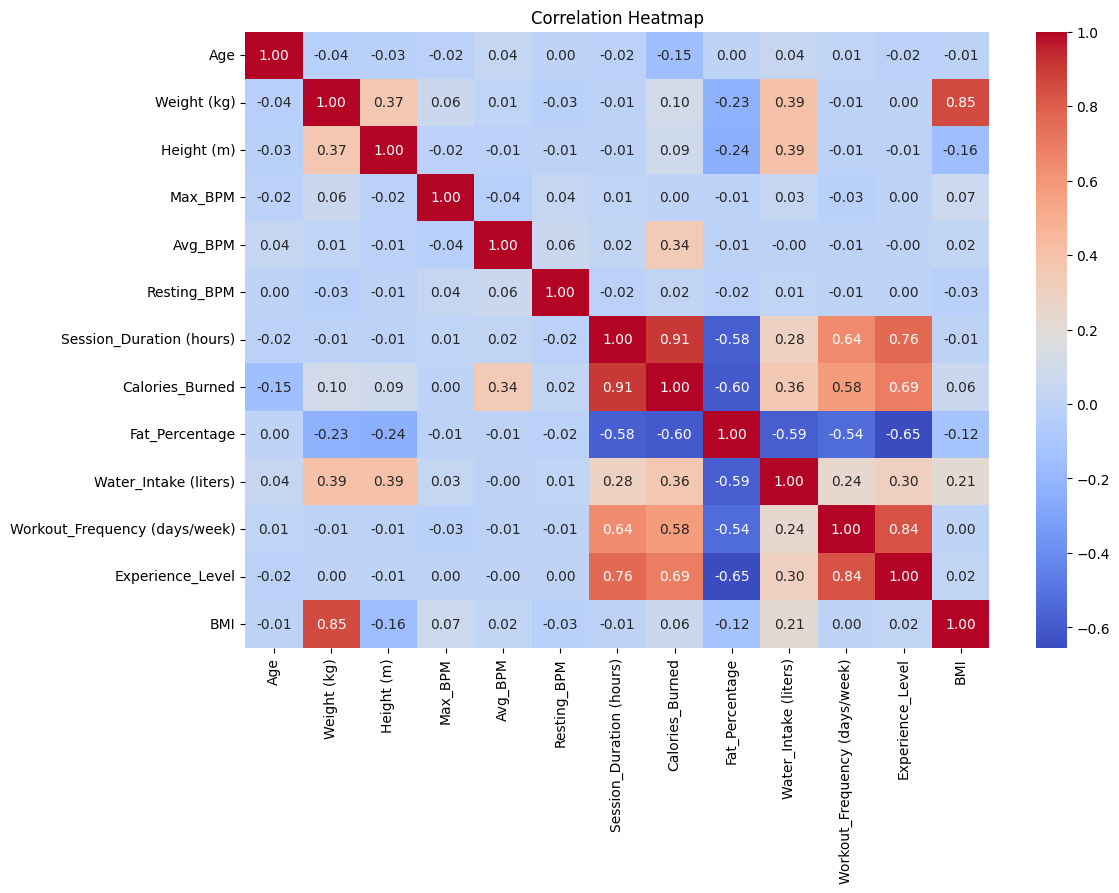

In [125]:
numerical_columns = gym_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(gym_df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Since my goal is to see if I can model calories burned, my first lazy impression is that the variables with direct correlation are the session duration and experience level.  Fat percentage also shows some negative correlation and a few others show weaker, but notable correlation. 

However, I noticed some other side correlations like Experience level and session duration.  This might be useful later to rule out some variables. 

In [126]:
df = gym_df.copy()
# Apply StandardScaler to numerical columns
#scaler = StandardScaler()
#numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
#df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

columns = ['Gender', 'Workout_Type']
df = pd.get_dummies(df, columns=columns)


# Apply LabelEncoder to categorical columns
#label_encoder = LabelEncoder()
#df['Gender'] = label_encoder.fit_transform(df['Gender'])
#df['Workout_Type'] = label_encoder.fit_transform(df['Workout_Type'])



# Place the results in a new df object
df.head()
#df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,False,True,False,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,True,False,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,True,False,True,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,False,True,False,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,False,True,False,False,True,False


In [127]:
df.cov()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
Age,148.375004,-9.387510,-0.043308,-2.396882,6.285127,0.388571,-0.083201,-513.692283,0.180706,0.303599,0.089588,-0.168273,-1.110859,-0.165386,0.165386,-0.265721,0.059626,0.070647,0.135447
Weight (kg),-9.387510,449.758077,0.989516,13.947509,2.956288,-4.993894,-0.099415,551.858465,-29.935910,5.018399,-0.227895,0.052999,120.517570,-6.138540,6.138540,0.258804,0.175840,-0.442496,0.007852
Height (m),-0.043308,0.989516,0.016312,-0.025996,-0.027072,-0.004763,-0.000447,3.006790,-0.188288,0.030166,-0.001314,-0.000970,-0.135664,-0.037234,0.037234,-0.000800,-0.000731,-0.001559,0.003090
Max_BPM,-2.396882,13.947509,-0.025996,132.841437,-6.572390,3.094857,0.039739,6.567625,-0.653318,0.218732,-0.306224,0.004645,5.151749,-0.058997,0.058997,-0.002454,0.052125,-0.227404,0.177733
Avg_BPM,6.285127,2.956288,-0.027072,-6.572390,205.781935,6.268134,0.078805,1328.428895,-0.655630,-0.025059,-0.139894,-0.009424,2.064427,-0.069152,0.069152,0.032398,-0.054980,0.145258,-0.122676
Resting_BPM,0.388571,-4.993894,-0.004763,3.094857,6.268134,53.685807,-0.041846,32.997261,-0.772078,0.033975,-0.053298,0.009526,-1.588232,-0.051477,0.051477,-0.061595,0.105671,0.064260,-0.108336
Session_Duration (hours),-0.083201,-0.099415,-0.000447,0.039739,0.078805,-0.041846,0.117672,84.933981,-1.248634,0.058348,0.201748,0.194052,-0.014835,0.002091,-0.002091,-0.009535,0.006965,0.000990,0.001579
Calories_Burned,-513.692283,551.858465,3.006790,6.567625,1328.428895,32.997261,84.933981,74333.396493,-1019.876701,58.405205,143.423649,139.985746,108.527588,-20.520732,20.520732,-5.485302,4.634412,1.400226,-0.549336
Fat_Percentage,0.180706,-29.935910,-0.188288,-0.653318,-0.655630,-0.772078,-1.248634,-1019.876701,39.180324,-2.211521,-3.069372,-3.029729,-4.972242,1.273797,-1.273797,0.110415,-0.117250,0.128079,-0.121244
Water_Intake (liters),0.303599,5.018399,0.030166,0.218732,-0.025059,0.033975,0.058348,58.405205,-2.211521,0.360206,0.130729,0.135005,0.854289,-0.200204,0.200204,-0.002559,0.005985,-0.007271,0.003846


In [128]:
df.corr()['Calories_Burned'].sort_values(ascending=False)


Calories_Burned                  1.000000
Session_Duration (hours)         0.908140
Experience_Level                 0.694129
Workout_Frequency (days/week)    0.576150
Water_Intake (liters)            0.356931
Avg_BPM                          0.339659
Gender_Male                      0.150646
Weight (kg)                      0.095443
Height (m)                       0.086348
BMI                              0.059761
Workout_Type_HIIT                0.040550
Resting_BPM                      0.016518
Workout_Type_Strength            0.011629
Max_BPM                          0.002090
Workout_Type_Yoga               -0.004678
Workout_Type_Cardio             -0.045726
Gender_Female                   -0.150646
Age                             -0.154679
Fat_Percentage                  -0.597615
Name: Calories_Burned, dtype: float64

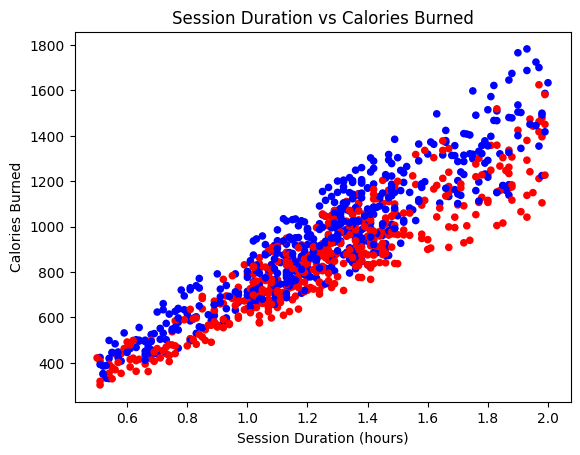

In [129]:
colors = df['Gender_Male'].map({True: 'blue', False: 'red'})
gym_df.plot(x='Session_Duration (hours)', y='Calories_Burned', kind='scatter', c=colors)
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.title('Session Duration vs Calories Burned')
plt.show()

Session Length and Calories are almost perfectly linear.  I'll come back to this one later. 

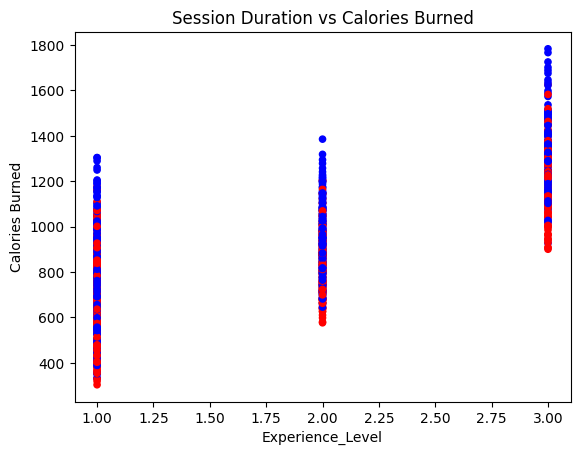

In [130]:
gym_df.plot(x='Experience_Level', y='Calories_Burned', kind='scatter', c=colors)
plt.xlabel('Experience_Level')
plt.ylabel('Calories Burned')
plt.title('Session Duration vs Calories Burned')
plt.show()

Gender doesn't seem like it's doing a lot in this case, but there's a clear rising trend with experience level.  So let's explore this for a sec and see if there's anything useful there or if there's a way we can largely rule this out. 

<hr>

# Experience Level vs Cal Burned
This one I highly suspect is tied to work out length. Based on personal experience at the gym, the people I'm most likely to see when I go to my gym are the "regulars" meaning that the people who really take their fitness seriously, athletes, or other people who are trying to obtain a goal.   This not only implies that they go more days of the week, but also that when they do go they probably stay for a larger window for you to run into them. 

My hypothesis in this case is that typically people who have been in the gym longer will tend to undergo longer sessions.  This is because as someone who goes to the gym regularly, if you really love and have fun at the gym you're more likely to stick around.   

So I'm going to now color the data with session hours as the hue color. 

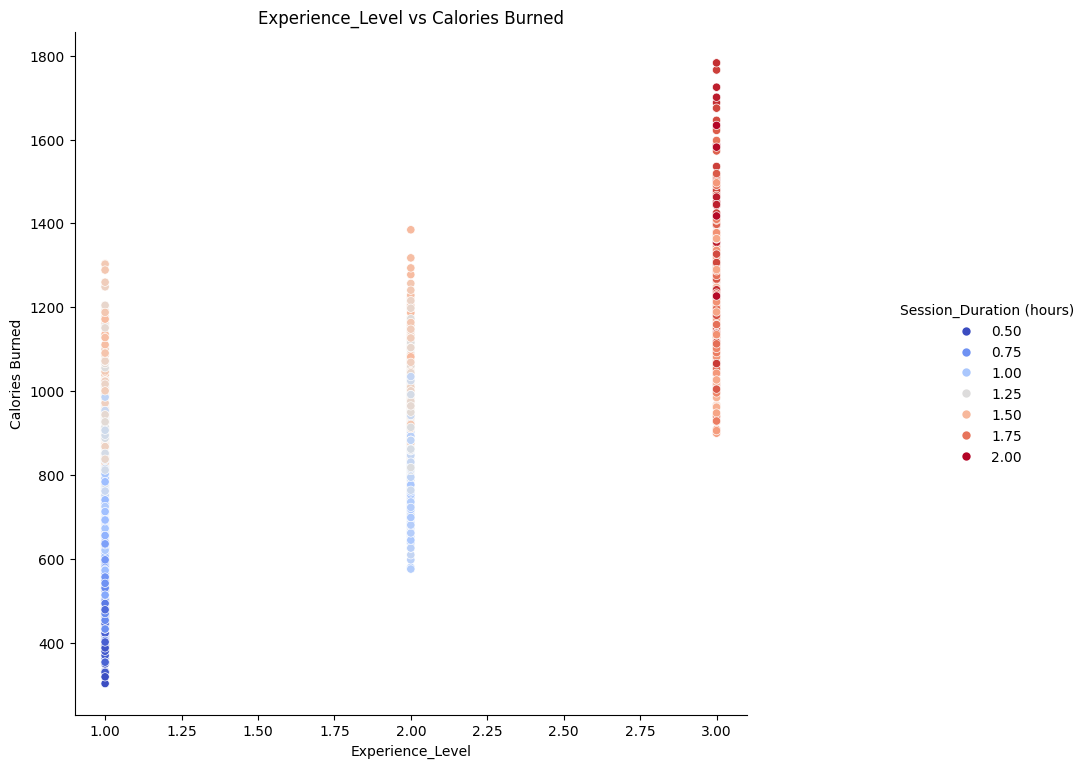

In [131]:
sns.relplot(data=gym_df, x='Experience_Level', y='Calories_Burned', hue='Session_Duration (hours)', palette='coolwarm')
plt.xlabel('Experience_Level')
plt.ylabel('Calories Burned')
plt.gcf().set_size_inches(12, 8)
plt.title('Experience_Level vs Calories Burned')
plt.show()

**Comment:** Sure enough my hypothesis seems to have merit.  It's nearly perfectly lined up with experience level. So the calories burned and experience level correlation may actually have more to do with the fact that more experienced gym goers tend to stay longer.  Thus it seems like experience level is not going to be useful to our purposes. 

Hey kids, domain knowledge is good sometimes. :)

This likely means that any correlation between the two will not be causal since it seems to be more because the two variables are tied to a third variable. 

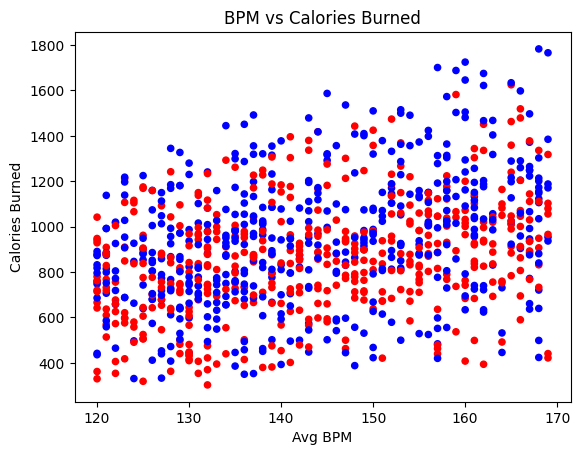

In [132]:
gym_df.plot(x='Avg_BPM', y='Calories_Burned', kind='scatter', c=colors)
plt.xlabel('Avg BPM')
plt.ylabel('Calories Burned')
plt.title('BPM vs Calories Burned')
plt.show()

**Comments:** BPM vs Cal on the surface doesn't seem like much.   Not going to throw it out just yet, but we have to see.

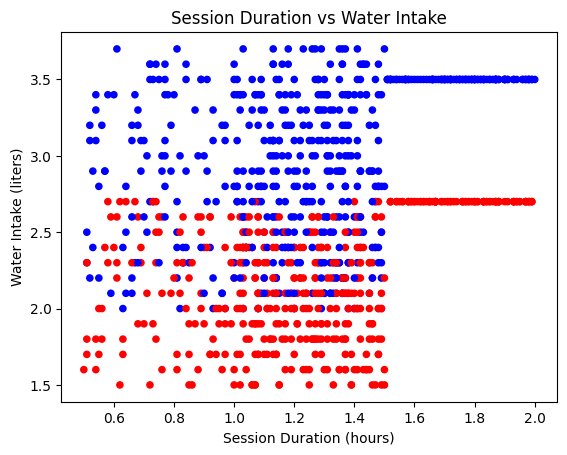

In [133]:
gym_df.plot(x="Session_Duration (hours)",y='Water_Intake (liters)', kind='scatter', c=colors)
plt.xlabel('Session Duration (hours)')
plt.ylabel('Water Intake (liters)')
plt.title('Session Duration vs Water Intake')
plt.show()

# Breakdown
The Session Duration has nearly perfect correlation with Calories_Burned, but this is sort of a "well duh!" kind of variable.  They're practically linear because the Calories_Burned is an extrinsic variable meaning that it will naturally increase with session size. 5min of carido will of course burn less calories than 1hr of cardio.  As a result it's zero shock that a variable that increases with size is directly linked to the variable with measures session size.  

I think in this case we need to start looking for intrinsic variables because some of the intial correlations seem to be all tied to session length. 

To get a better feel for this we need to look at "Calories per hour" as that would likely give us a much better inside. 

In [134]:
df['Calories_Burned_per_Hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']
df.drop(columns=['Session_Duration (hours)'], inplace=True)
df.drop(columns=['Calories_Burned'], inplace=True)
df.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Calories_Burned_per_Hour
0,56,88.3,1.71,180,157,60,12.6,3.5,4,3,30.20,False,True,False,False,False,True,776.923077
1,46,74.9,1.53,179,151,66,33.9,2.1,4,2,32.00,True,False,False,True,False,False,679.230769
2,32,68.1,1.66,167,122,54,33.4,2.3,4,2,24.71,True,False,True,False,False,False,609.909910
3,25,53.2,1.70,190,164,56,28.8,2.1,3,1,18.41,False,True,False,False,True,False,901.694915
4,38,46.1,1.79,188,158,68,29.2,2.8,3,1,14.39,False,True,False,False,True,False,868.750000


In [135]:
df.corr()['Calories_Burned_per_Hour'].sort_values(ascending=False)

Calories_Burned_per_Hour         1.000000
Avg_BPM                          0.810482
Gender_Male                      0.395192
Weight (kg)                      0.260520
Water_Intake (liters)            0.243563
Height (m)                       0.222949
BMI                              0.160111
Resting_BPM                      0.057929
Workout_Type_Strength            0.024706
Workout_Type_Cardio              0.023502
Experience_Level                 0.006702
Max_BPM                         -0.008269
Workout_Frequency (days/week)   -0.016595
Workout_Type_HIIT               -0.024370
Workout_Type_Yoga               -0.025625
Fat_Percentage                  -0.171970
Age                             -0.334258
Gender_Female                   -0.395192
Name: Calories_Burned_per_Hour, dtype: float64

Workout Type seems to have minimal impact on calories per hour.   Avg_BPM, Gender, Age, and Weight seem to have stronger correlations.   

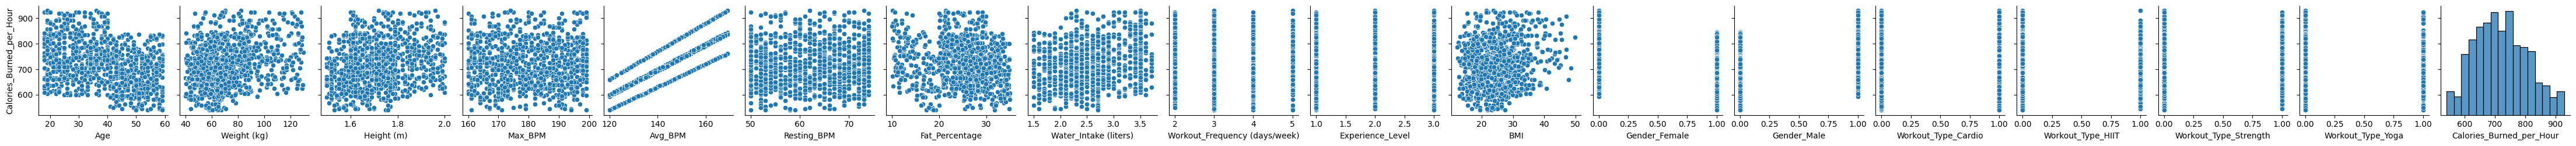

In [136]:
# Create scatter plots for all numerical columns with Calories_Burned_per_Hour as the y-axis
sns.pairplot(df, y_vars=['Calories_Burned_per_Hour'], x_vars=df.columns.values)
plt.show()


<Axes: xlabel='Water_Intake (liters)', ylabel='Calories_Burned_per_Hour'>

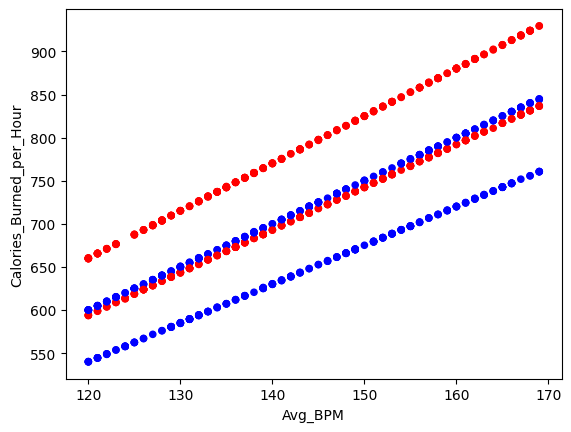

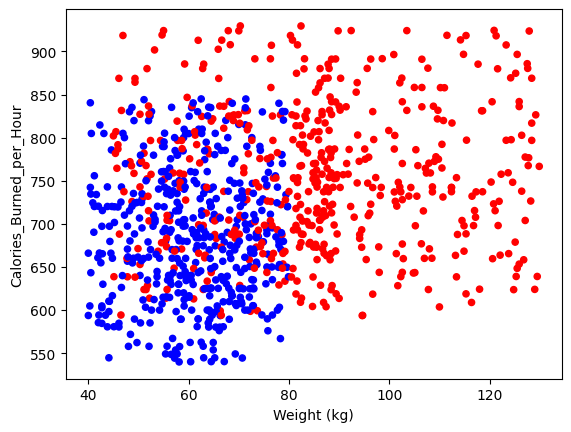

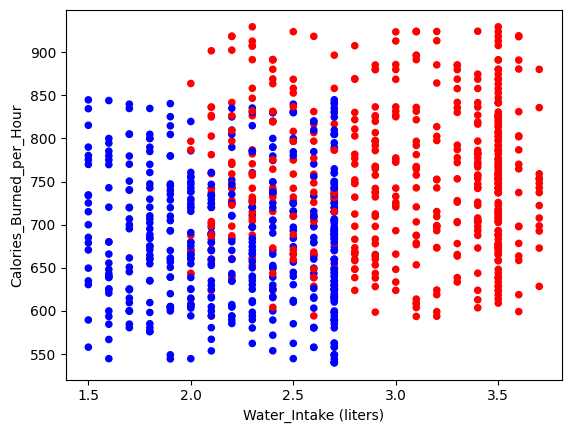

In [137]:
colors_gen = df['Gender_Female'].map({True: 'blue', False: 'red'})
df.plot(kind='scatter', x='Avg_BPM', y='Calories_Burned_per_Hour', c=colors_gen)
df.plot(kind='scatter', x='Weight (kg)', y='Calories_Burned_per_Hour', c=colors_gen)
df.plot(kind='scatter', x='Water_Intake (liters)', y='Calories_Burned_per_Hour', c=colors_gen)

Avg_BPM shows 4 linear trends that are overlapped on each other. Sure enough this correlation seems to be something that only appears when you compare intrinsic vs intrinsic.  Have to be careful though since we could have accidentally introduced that since both variables are per unit time.

<Axes: xlabel='Age', ylabel='Calories_Burned_per_Hour'>

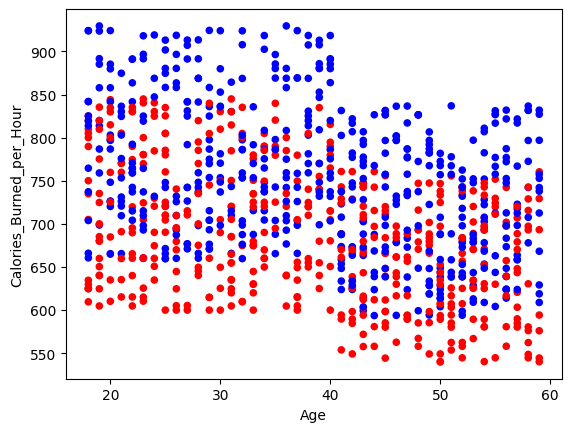

In [138]:
df.plot(kind='scatter', x='Age', y='Calories_Burned_per_Hour', c=colors)

There seems to be a line in the middle where a clear drop off occurs around age 40.  

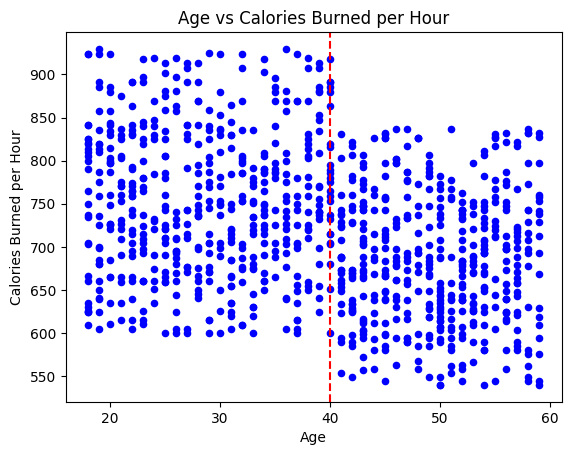

In [139]:

df.plot(kind='scatter', x='Age', y='Calories_Burned_per_Hour', c="blue")
plt.axvline(x=40, color='red', linestyle='--')
plt.xlabel('Age')
plt.ylabel('Calories Burned per Hour')
plt.title('Age vs Calories Burned per Hour')
plt.show()

So let's try encoding a binary class.  If over 40 we set this new column to 1, otherwise set it to 0 for under 40.

In [140]:
df['Age_Group'] = df['Age'].apply(lambda x: 0 if x <= 40 else 1)
df.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Calories_Burned_per_Hour,Age_Group
0,56,88.3,1.71,180,157,60,12.6,3.5,4,3,30.20,False,True,False,False,False,True,776.923077,1
1,46,74.9,1.53,179,151,66,33.9,2.1,4,2,32.00,True,False,False,True,False,False,679.230769,1
2,32,68.1,1.66,167,122,54,33.4,2.3,4,2,24.71,True,False,True,False,False,False,609.909910,0
3,25,53.2,1.70,190,164,56,28.8,2.1,3,1,18.41,False,True,False,False,True,False,901.694915,0
4,38,46.1,1.79,188,158,68,29.2,2.8,3,1,14.39,False,True,False,False,True,False,868.750000,0


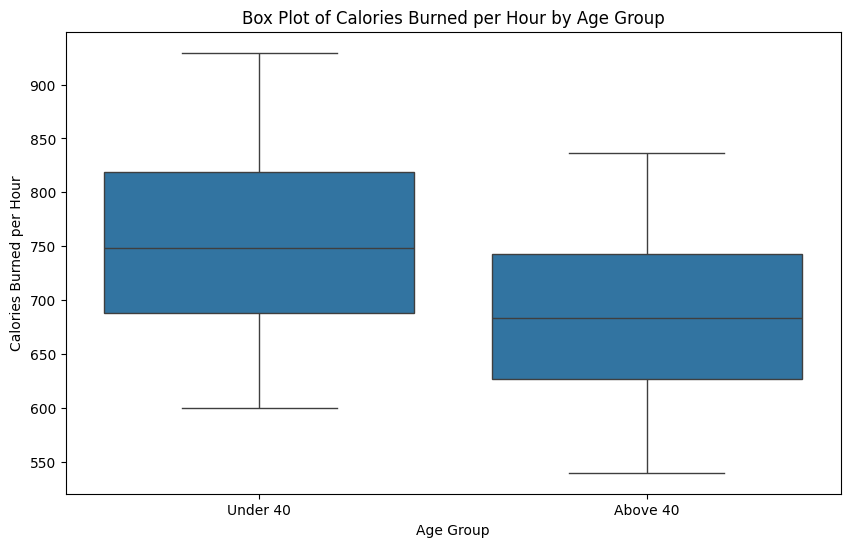

In [141]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Calories_Burned_per_Hour', data=df)
plt.xticks([0, 1], ['Under 40', 'Above 40'])
plt.xlabel('Age Group')
plt.ylabel('Calories Burned per Hour')
plt.title('Box Plot of Calories Burned per Hour by Age Group')
plt.show()

Age actually shows a split above and below 40.  Let's use this information and see if it explains the multiple linear trend in the BPM vs Cal chart

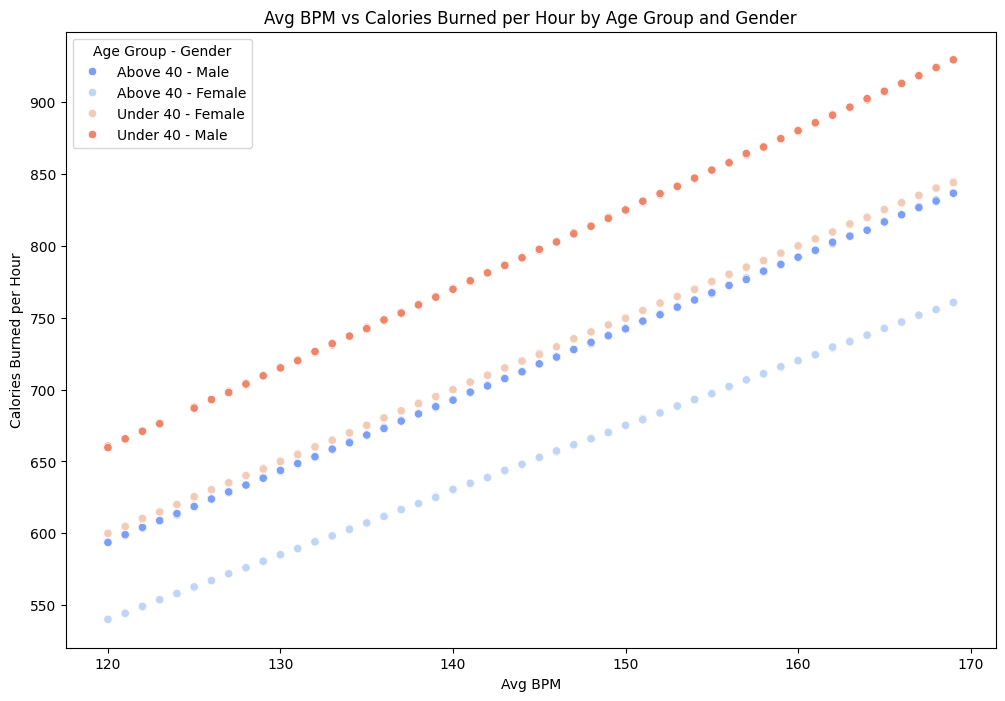

In [142]:
# Create a new column combining Age_Group and Gender for coloring
df['Age_Gender'] = df.apply(lambda row: f"{'Under 40' if row['Age_Group'] == 0 else 'Above 40'} - {'Male' if row['Gender_Male'] else 'Female'}", axis=1)

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Avg_BPM', y='Calories_Burned_per_Hour', hue='Age_Gender', palette='coolwarm')
plt.xlabel('Avg BPM')
plt.ylabel('Calories Burned per Hour')
plt.title('Avg BPM vs Calories Burned per Hour by Age Group and Gender')
plt.legend(title='Age Group - Gender')
plt.show()

Yes it does.  The 4 lines are due to both Age and Gender.  While avg BMP is the primary factor, it seems like Gender and Age split the data. 

<hr>

# Modeling

So originally I was planning on modeling this using something such as a XGBoost or other thing, but it seems like I can actually just model it using a linear model.  Keep it simple stupid.

In [143]:
X = df[['Age_Group', 'Gender_Male', 'Avg_BPM']]
y = df['Calories_Burned_per_Hour']

X['Gender_Male'] = X['Gender_Male'].map({True: 1, False: 0})
print(X.head())
print(y.head())

   Age_Group  Gender_Male  Avg_BPM
0          1            1      157
1          1            0      151
2          0            0      122
3          0            1      164
4          0            1      158
0    776.923077
1    679.230769
2    609.909910
3    901.694915
4    868.750000
Name: Calories_Burned_per_Hour, dtype: float64


/tmp/ipykernel_226543/1002452715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender_Male'] = X['Gender_Male'].map({True: 1, False: 0})


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_model.score(X_train, y_train)

0.9962599738401533

In [145]:
# Display the coefficients of the linear regression model
coefficients = lin_model.coef_
intercept = lin_model.intercept_

# Create a DataFrame for better visualization
coef_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])
print("Intercept:", intercept)
print(coef_df)

Intercept: -0.17550698946661214
             Coefficient
Age_Group     -75.721158
Gender_Male    68.305437
Avg_BPM         5.012611


In [146]:
# Check its performance on the test set
lin_model.score(X_test, y_test)

0.9965069980645697

In [147]:
x_male_over40 = X[(X['Age_Group'] == 1) & (X['Gender_Male'] == 1)]
x_male_under40 = X[(X['Age_Group'] == 0) & (X['Gender_Male'] == 1)]

x_female_over40 = X[(X['Age_Group'] == 1) & (X['Gender_Male'] == 0)]
x_female_under40 = X[(X['Age_Group'] == 0) & (X['Gender_Male'] == 0)]

y_male_over40 = lin_model.predict(x_male_over40)
y_male_under40 = lin_model.predict(x_male_under40)

y_female_over40 = lin_model.predict(x_female_over40)
y_female_under40 = lin_model.predict(x_female_under40)


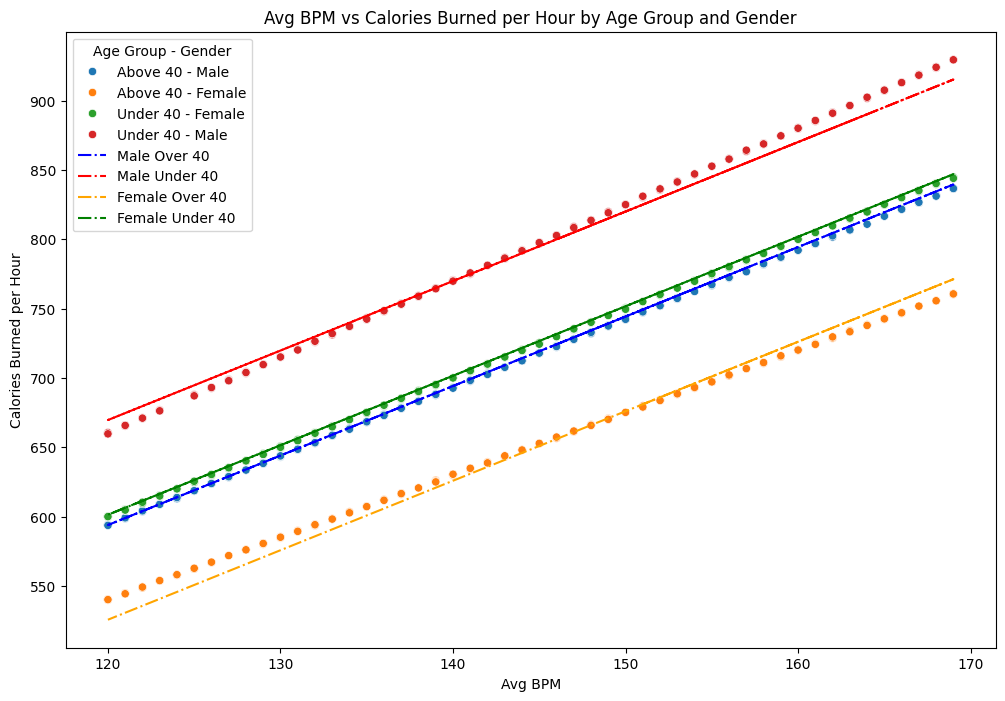

In [154]:
# Plot the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Avg_BPM', y='Calories_Burned_per_Hour', hue='Age_Gender')

# Plot the regression lines
plt.plot(x_male_over40['Avg_BPM'], y_male_over40, color='blue', linestyle='-.', label='Male Over 40')
plt.plot(x_male_under40['Avg_BPM'], y_male_under40, color='red', linestyle='-.', label='Male Under 40')
plt.plot(x_female_over40['Avg_BPM'], y_female_over40, color='orange', linestyle='-.', label='Female Over 40')
plt.plot(x_female_under40['Avg_BPM'], y_female_under40, color='green', linestyle='-.', label='Female Under 40')

# Add labels and title
plt.xlabel('Avg BPM')
plt.ylabel('Calories Burned per Hour')
plt.title('Avg BPM vs Calories Burned per Hour by Age Group and Gender')
plt.legend(title='Age Group - Gender')
plt.show()

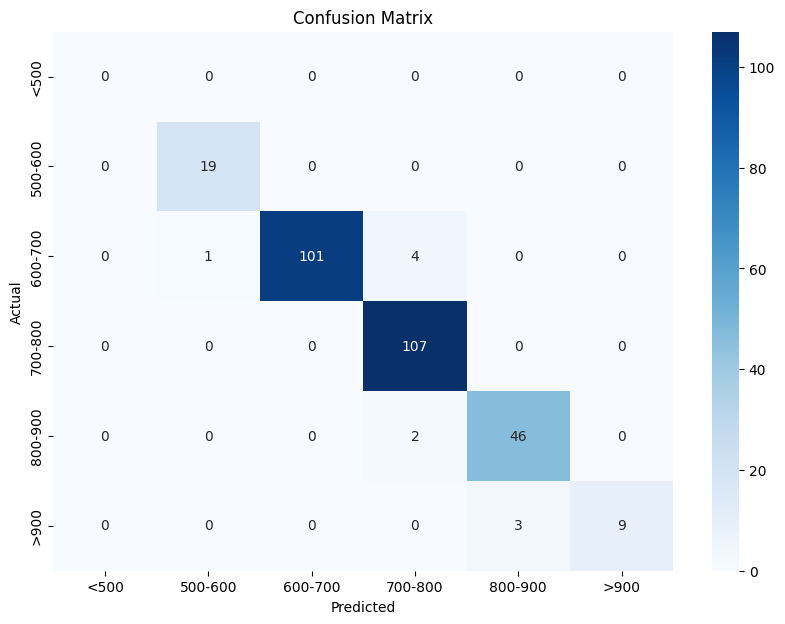

In [156]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_test_pred = lin_model.predict(X_test)

# Define bins for categorizing the continuous values
bins = [0, 500, 600, 700, 800, 900, 1000]
labels = ['<500', '500-600', '600-700', '700-800', '800-900', '>900']

# Bin the actual and predicted values
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
y_test_pred_binned = pd.cut(y_test_pred, bins=bins, labels=labels)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_binned, y_test_pred_binned, labels=labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<hr>

# Conclusion

We pretty much found you can predict the Calories burned primarily with 3 variables in the original set.  You need to do a bit of cleaning of the data after realizing that the original data format was extrinsic, but once you normalize for time and observe the Over 40 vs Under 40 split you find there's a incredibly easy split.

Overall not too bad.  

<hr>